In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import reuters

%matplotlib inline

Using TensorFlow backend.


In [20]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
train_data.shape, test_data.shape

((8982,), (2246,))

In [4]:
print(train_data[0])
print()
print(len(train_data[0]))

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]

87


In [58]:
np.unique(train_labels)

8982

In [6]:
word_index_dict = reuters.get_word_index()

In [11]:
index_word_dict = dict([(value, key) for (key, value) in word_index_dict.items()])
decoded_newswire = ' '.join([index_word_dict.get(i - 3, '?') for i in train_data[1]])

In [12]:
decoded_newswire

'? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3'

In [13]:
train_data[0][0]

1

In [14]:
len(word_index_dict)

30979

In [21]:
max([max(sequence) for sequence in train_data])

9999

In [51]:
def vectorize_sequences(sequences, dimension=10000):
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences) :
        result[i, sequence] = 1
    return result

In [52]:
a = np.zeros((3,3))

In [53]:
a[0, np.array([0,1])] = 1
a

array([[1., 1., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [54]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [55]:
def to_one_hot(labels, dimension=46):
    result = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        result[i, label] = 1
    return result

In [56]:
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [69]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(10000,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=46, activation='softmax'))

In [70]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [71]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [72]:
history = model.fit(partial_x_train, partial_y_train, batch_size=512, epochs=20, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 212us/step - loss: 2.5738 - acc: 0.5222 - val_loss: 1.6932 - val_acc: 0.6330
Epoch 2/20
7982/7982 [==============================] - 1s 186us/step - loss: 1.4024 - acc: 0.7085 - val_loss: 1.2709 - val_acc: 0.7390
Epoch 3/20
7982/7982 [==============================] - 1s 186us/step - loss: 1.0386 - acc: 0.7874 - val_loss: 1.1224 - val_acc: 0.7670
Epoch 4/20
7982/7982 [==============================] - 1s 187us/step - loss: 0.8146 - acc: 0.8317 - val_loss: 1.0217 - val_acc: 0.7840
Epoch 5/20
7982/7982 [==============================] - 1s 187us/step - loss: 0.6491 - acc: 0.8663 - val_loss: 0.9641 - val_acc: 0.7950
Epoch 6/20
7982/7982 [==============================] - 1s 188us/step - loss: 0.5146 - acc: 0.8955 - val_loss: 0.9004 - val_acc: 0.8130
Epoch 7/20
7982/7982 [==============================] - 2s 204us/step - loss: 0.4107 - acc: 0.9131 - val_loss: 0.8911 - val_acc: 0.8200


In [75]:
history.history.keys()

dict_keys(['val_loss', 'acc', 'val_acc', 'loss'])

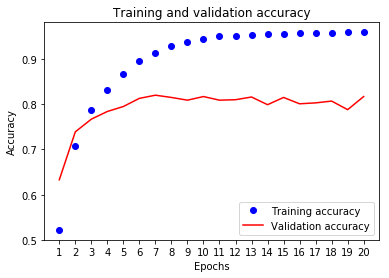

In [82]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.xticks(epochs)
plt.ylabel('Accuracy')
plt.legend()

plt.show()

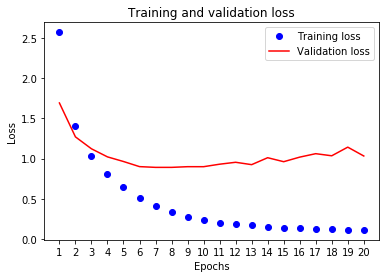

In [83]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.xticks(epochs)
plt.ylabel('Loss')
plt.legend()

plt.show()

In [86]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,
          y_train,
          epochs=7,
          batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/7
8982/8982 [==============================] - 2s 191us/step - loss: 2.4065 - acc: 0.5736
Epoch 2/7
8982/8982 [==============================] - 2s 173us/step - loss: 1.2705 - acc: 0.7268
Epoch 3/7
8982/8982 [==============================] - 2s 173us/step - loss: 0.9514 - acc: 0.7958
Epoch 4/7
8982/8982 [==============================] - 2s 174us/step - loss: 0.7399 - acc: 0.8429
Epoch 5/7
8982/8982 [==============================] - 2s 173us/step - loss: 0.5879 - acc: 0.8773
Epoch 6/7
8982/8982 [==============================] - 2s 175us/step - loss: 0.4685 - acc: 0.9007
Epoch 7/7
2246/2246 [==============================] - 1s 232us/step


In [88]:
results

[0.9367848928762352, 0.7907390917186109]

In [89]:
predictions = model.predict(x_test)

In [91]:
len(predictions[0])

46

In [92]:
np.argmax(predictions[0])

3

In [96]:
test_labels[0]

3

In [95]:
predictions[0]

array([5.0481285e-05, 6.6648045e-04, 9.4142470e-06, 7.1737915e-01,
       2.3808005e-01, 2.1194948e-05, 5.7063228e-04, 4.0342875e-05,
       2.7223239e-03, 1.2207126e-04, 1.0929569e-04, 2.2937618e-03,
       1.4344257e-03, 1.3498457e-03, 9.2321461e-05, 2.9086150e-04,
       5.6083663e-03, 1.3839948e-03, 2.5670347e-04, 8.3656870e-03,
       6.0226796e-03, 1.4189740e-03, 3.9684477e-05, 4.1092990e-04,
       8.4514933e-05, 6.2165776e-04, 3.0134054e-04, 9.9325180e-06,
       2.3128467e-03, 1.7710016e-04, 4.3458780e-04, 2.3472207e-04,
       9.8847835e-05, 1.8130583e-04, 6.6362822e-04, 3.3193533e-05,
       1.5980770e-03, 2.1633964e-04, 1.4681081e-04, 9.1024733e-04,
       7.6690689e-05, 5.3702341e-04, 5.1324638e-05, 2.3806035e-03,
       1.6589741e-04, 2.3736266e-05], dtype=float32)